In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("../data/water_potability.csv")

In [4]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
# Shape of dataset
print(data.shape)

# Info
print(data.info())

# Missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


(3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
                ph     Hardnes

In [8]:
# Replace missing values by median safely
data['ph'] = data['ph'].fillna(data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())

In [9]:
# List of numeric features to check
numeric_cols = ['ph','Hardness','Solids','Chloramines','Sulfate',
                'Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

# Clip outliers
for col in numeric_cols:
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower, upper)


In [10]:
data.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.075579,196.377131,21986.861995,7.121080,333.666594,426.094862,14.283331,66.431417,3.966520,0.390110
std,1.418082,32.148545,8593.336883,1.539526,34.900201,79.584453,3.249256,15.396242,0.765986,0.487849
min,3.442510,114.236366,5416.238724,3.203082,237.136957,269.422947,6.452487,28.524993,2.161414,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,10.812925,278.062602,45974.106490,10.967153,429.028139,617.626558,22.090049,104.606299,5.741640,1.000000


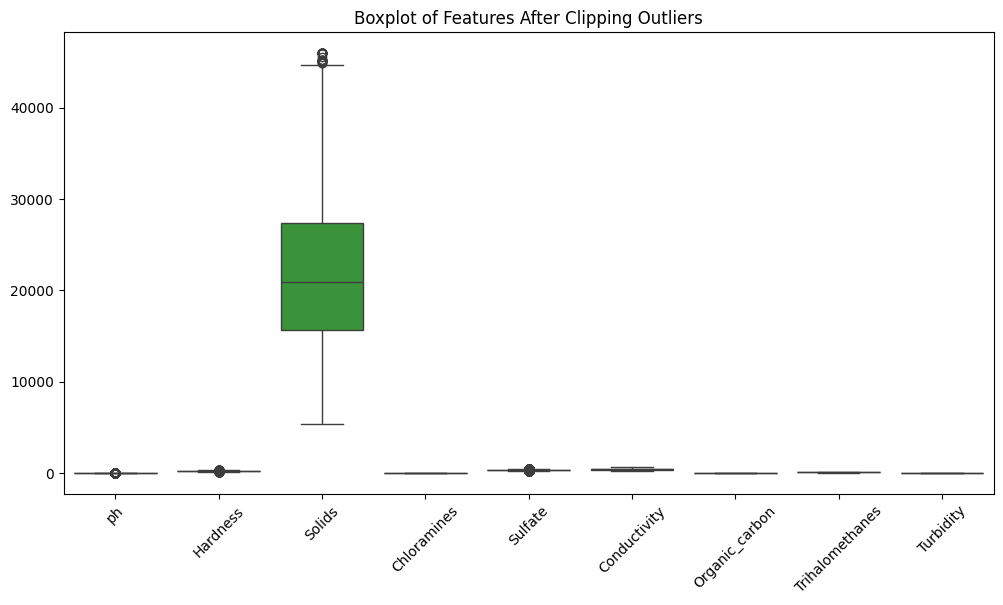

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Features After Clipping Outliers")
plt.show()


In [12]:
data.to_csv('../data/cleaned_water.csv', index=False)
